In [1]:
using Distributions
using Plots
using AdaptiveSurveillance
using Random

┌ Info: Precompiling AdaptiveSurveillance [69006bd4-4c56-49bd-9558-74ccc455f1d0]
└ @ Base loading.jl:1278


In [2]:
const L = 2
const output_path = joinpath(dirname(pathof(AdaptiveSurveillance)), "..", "results", "tmp")
const ν = 1 / 21 # approx 6 months until there is an outbreak
const Γd = [Geometric(ν) for l = 1:L]
const p0 = [0.01, 0.01, 0.01]
const β = 4e-6 * 536 * 7
const p = repeat(prevalance_sequence(p0[1], β), 1, L)
const n = 200

200

In [3]:
α = 1000 # the higher, the less false positives

1000

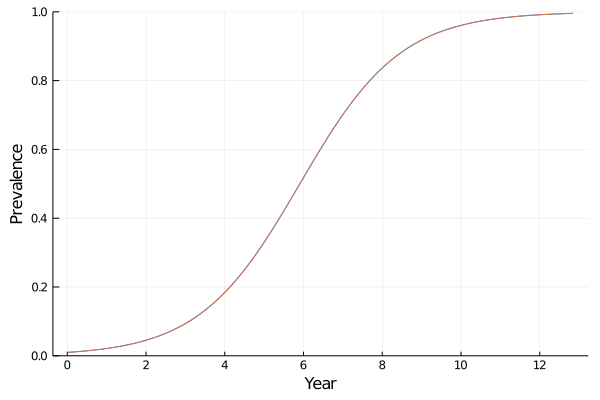

In [60]:
T = length(p[:, 1])
plot((1:T)./52, p, ylim=(0, 1), legend=false, xlabel = "Year", ylabel = "Prevalence")

In [61]:
p_logistic(t) = 1 / (1 + (1 / p0[1] - 1) * exp(-β * t));
pred_log = zeros(T)
for t = 1:T
    pred_log[t] = p_logistic(t)
end

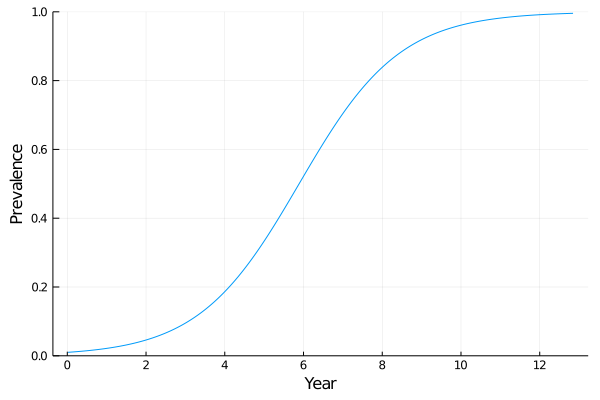

In [62]:
plot((1:T)./52, pred_log, ylim=(0, 1), legend=false, xlabel = "Year", ylabel = "Prevalence")

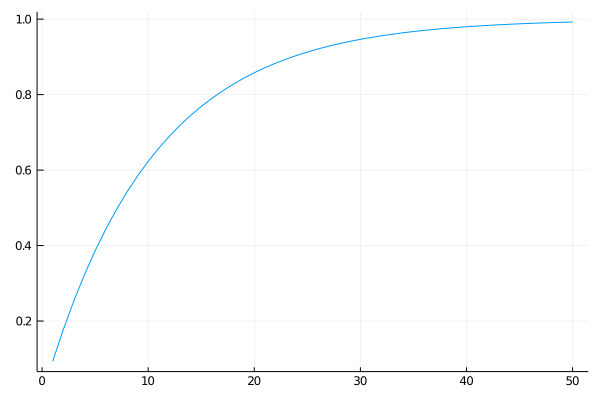

In [67]:
Γd_all = Geometric(1 - prod(1 .- succprob.(Γd)))
plot(1:50, cdf.(Γd_all, 0:(49)), legend = false)

In [21]:
apolicy_constant_p(L, Γd, n, α, test_data, t) = apolicy_constant(L, Γd, n, α, test_data, t, apolicy_isotonic, 1)

apolicy_constant_p (generic function with 1 method)

In [59]:
# Debug
t, la, false_alarm, delay, test_data, z, thres = replication(L, Γd, [typemax(Int64), 0], p0, p, n, apolicy_isotonic, α, 
    tpolicy_evsi, 1, rng = MersenneTwister(1), maxiters = 1000);

base64 binary data: 4pQyw5cyIERhdGFGcmFtZQrilIIgUm93IOKUgiB0ICAgICDilIIgcHMgICAgICAgIOKUggrilIIgICAgIOKUgiAbWzkwbUludDY0G1szOW0g4pSCIBtbOTBtRmxvYXQ2NBtbMzltICAg4pSCCuKUnOKUgOKUgOKUgOKUgOKUgOKUvOKUgOKUgOKUgOKUgOKUgOKUgOKUgOKUvOKUgOKUgOKUgOKUgOKUgOKUgOKUgOKUgOKUgOKUgOKUgOKUpArilIIgMSAgIOKUgiAxICAgICDilIIgMC4wMTEyNjQyIOKUggrilIIgMiAgIOKUgiAyICAgICDilIIgMC4wMTEyNjQyIOKUggpbNC4wLCAxLjBdCkZsb2F0NjRbXQozIDogWzAuMDExMjY0MzE5NzQ5MjkwMzkyLCAwLjBdCjLDlzIgRGF0YUZyYW1lCuKUgiBSb3cg4pSCIHQgICAgIOKUgiBwcyAgICAgICAg4pSCCuKUgiAgICAg4pSCIBtbOTBtSW50NjQbWzM5bSDilIIgG1s5MG1GbG9hdDY0G1szOW0gICDilIIK4pSc4pSA4pSA4pSA4pSA4pSA4pS84pSA4pSA4pSA4pSA4pSA4pSA4pSA4pS84pSA4pSA4pSA4pSA4pSA4pSA4pSA4pSA4pSA4pSA4pSA4pSkCuKUgiAxICAg4pSCIDEgICAgIOKUgiAwLjAxMTI2NDIg4pSCCuKUgiAyICAg4pSCIDIgICAgIOKUgiAwLjAxMTI2NDIg4pSCCls0LjAsIDEuMF0KWzAuMF0KNCA6IFswLjAxMTI2NDMxOTc0OTI5MDM4MiwgMC4wXQoyw5cyIERhdGFGcmFtZQrilIIgUm93IOKUgiB0ICAgICDilIIgcHMgICAgICAgIOKUggrilIIgICAgIOKUgiAbWzkwbUludDY0G1szOW0g4pSCIBtbOTBtRmxvYXQ2NBtbMzltICAg4pSCCuKU

2×2 DataFrame
│ Row │ t     │ ps        │
│     │ Int64 │ Float64   │
├─────┼───────┼───────────┤
│ 1   │ 1     │ 0.0112642 │
│ 2   │ 2     │ 0.0112642 │
[4.0, 1.0]
13×2 DataFrame
│ Row │ t     │ ps        │
│     │ Int64 │ Float64   │
├─────┼───────┼───────────┤
│ 1   │ 3     │ 0.0       │
│ 2   │ 4     │ 0.01      │
│ 3   │ 5     │ 0.01      │
│ 4   │ 6     │ 0.0115558 │
│ 5   │ 7     │ 0.0115558 │
│ 6   │ 8     │ 0.0115558 │
│ 7   │ 9     │ 0.011729  │
│ 8   │ 10    │ 0.011729  │
│ 9   │ 11    │ 0.011729  │
│ 10  │ 12    │ 0.011729  │
│ 11  │ 13    │ 0.011729  │
│ 12  │ 14    │ 0.0174118 │
│ 13  │ 15    │ 0.0174118 │
[0.0, 2.0, 2.0, 3.0, 2.0, 2.0, 4.0, 2.0, 2.0, 2.0, 2.0, 4.0, 3.0]
16 : [0.011264319749290371, 0.018303973150887796]
2×2 DataFrame
│ Row │ t     │ ps        │
│     │ Int64 │ Float64   │
├─────┼───────┼───────────┤
│ 1   │ 1     │ 0.0112642 │
│ 2   │ 2     │ 0.0112642 │
[4.0, 1.0]
14×2 DataFrame
│ Row │ t     │ ps        │
│     │ Int64 │ Float64   │
├─────┼───────┼─────

2×2 DataFrame
│ Row │ t     │ ps        │
│     │ Int64 │ Float64   │
├─────┼───────┼───────────┤
│ 1   │ 1     │ 0.0112642 │
│ 2   │ 2     │ 0.0112642 │
[4.0, 1.0]
22×2 DataFrame
│ Row │ t     │ ps        │
│     │ Int64 │ Float64   │
├─────┼───────┼───────────┤
│ 1   │ 3     │ 0.0       │
│ 2   │ 4     │ 0.01      │
│ 3   │ 5     │ 0.01      │
│ 4   │ 6     │ 0.0102561 │
│ 5   │ 7     │ 0.0102561 │
│ 6   │ 8     │ 0.0102561 │
│ 7   │ 9     │ 0.0102561 │
│ 8   │ 10    │ 0.0102561 │
│ 9   │ 11    │ 0.0102561 │
│ 10  │ 12    │ 0.0102561 │
│ 11  │ 13    │ 0.0102561 │
│ 12  │ 14    │ 0.0102561 │
│ 13  │ 15    │ 0.0102561 │
│ 14  │ 16    │ 0.0102561 │
│ 15  │ 17    │ 0.0102561 │
│ 16  │ 18    │ 0.0102561 │
│ 17  │ 19    │ 0.0102561 │
│ 18  │ 20    │ 0.0102561 │
│ 19  │ 21    │ 0.0102561 │
│ 20  │ 22    │ 0.0102561 │
│ 21  │ 23    │ 0.0123753 │
│ 22  │ 24    │ 0.0123753 │
[0.0, 2.0, 2.0, 3.0, 2.0, 2.0, 4.0, 2.0, 2.0, 2.0, 2.0, 4.0, 3.0, 1.0, 3.0, 0.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0]
25 : [0.0

2×2 DataFrame
│ Row │ t     │ ps        │
│     │ Int64 │ Float64   │
├─────┼───────┼───────────┤
│ 1   │ 1     │ 0.0112642 │
│ 2   │ 2     │ 0.0112642 │
[4.0, 1.0]
29×2 DataFrame
│ Row │ t     │ ps        │
│     │ Int64 │ Float64   │
├─────┼───────┼───────────┤
│ 1   │ 3     │ 0.0       │
│ 2   │ 4     │ 0.01      │
│ 3   │ 5     │ 0.01      │
│ 4   │ 6     │ 0.0101422 │
│ 5   │ 7     │ 0.0101422 │
│ 6   │ 8     │ 0.0101422 │
│ 7   │ 9     │ 0.0101422 │
│ 8   │ 10    │ 0.0101422 │
│ 9   │ 11    │ 0.0101422 │
│ 10  │ 12    │ 0.0101422 │
│ 11  │ 13    │ 0.0101422 │
│ 12  │ 14    │ 0.0101422 │
│ 13  │ 15    │ 0.0101422 │
│ 14  │ 16    │ 0.0101422 │
│ 15  │ 17    │ 0.0101422 │
│ 16  │ 18    │ 0.0101422 │
│ 17  │ 19    │ 0.0101422 │
│ 18  │ 20    │ 0.0101422 │
│ 19  │ 21    │ 0.0101422 │
│ 20  │ 22    │ 0.0101422 │
│ 21  │ 23    │ 0.0101422 │
│ 22  │ 24    │ 0.0101422 │
│ 23  │ 25    │ 0.0101422 │
│ 24  │ 26    │ 0.0101422 │
│ 25  │ 27    │ 0.023579  │
│ 26  │ 28    │ 0.023579  │
│ 27  │ 

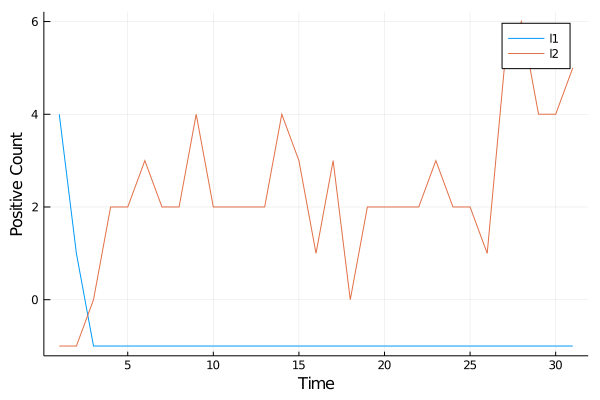

In [68]:
plot(1:(t-1), test_data[1:(t-1), :], xlabel = "Time", ylabel = "Positive Count", labels = ["l1" "l2" "l3"])

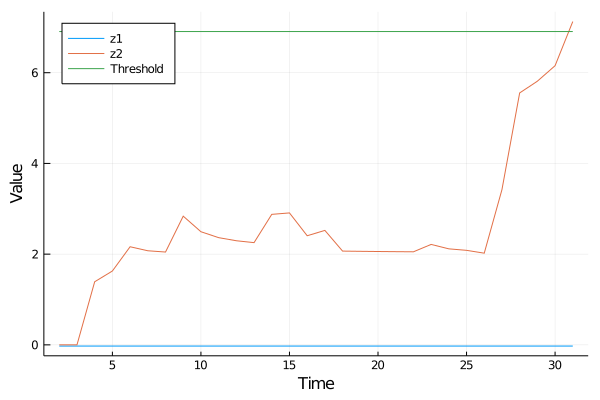

In [71]:
plot(2:(t-1), hcat(z[3:t, :], thres[3:t, 2]), xlabel = "Time", ylabel = "Value", 
    label = [["z$l" for l = 1:L]... "Threshold"], legend=:topleft)

In [23]:
# Alarm time distribution
atd_T = 200
atd_0 = alarm_time_distribution(Int(1e4), L, Γd, [0, 0, 0], p0, p, n, apolicy_isotonic, α, 
    tpolicy_random, 1, maxiters=atd_T);
atd_0 = cumsum(atd_0) ./ sum(atd_0);

In [24]:
atd_1 = alarm_time_distribution(Int(1e4), L, Γd, ones(Int64, L) * typemax(Int64), p0, p, n, apolicy_isotonic, α, 
    tpolicy_constant, 1, maxiters=atd_T);
atd_1 = cumsum(atd_1) ./ sum(atd_1);

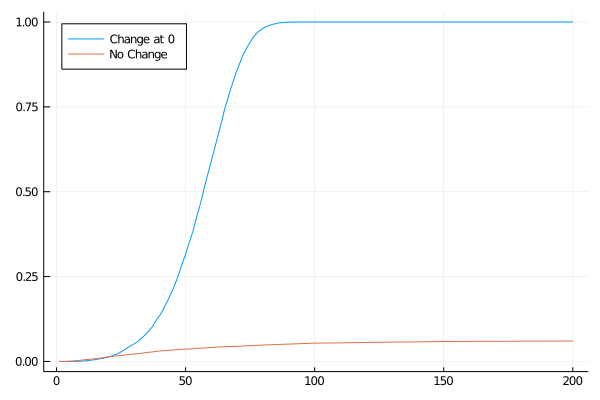

In [25]:
plot(1:atd_T, hcat(atd_0[1:atd_T], atd_1[1:atd_T]), label = ["Change at 0" "No Change"], legend=:topleft)

In [48]:
# Predictive Value - I cannot get this to work for multiple locations yet
# pvt = sp_single.predictive_value(Int(1e4), 21, 52, Γd, p0, p, n, sp_single.apolicy_isotonic, α);
#alarm_counts, atl, pvt = predictive_value_ratio(1e-3, 52, L, Γd, p0, p, n, apolicy_constant_p, α, 
#    tpolicy_constant, 1, miniters=Int(1e4))

([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN  …  NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN])

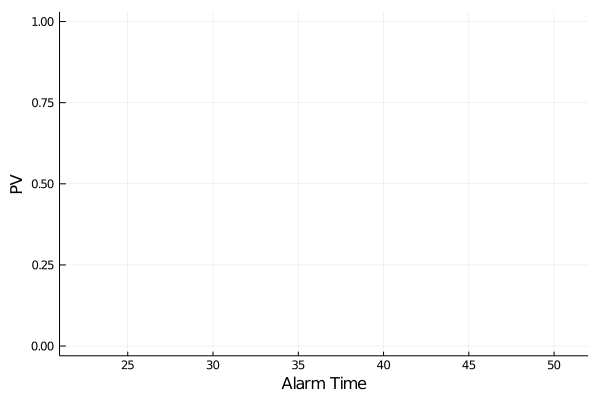

In [49]:
# plot(pvt, xlabel = "Alarm Time", ylabel = "PV", legend=false, xlim=(21, 52))

In [27]:
# Probability of successful detection
T_end = 21
sp2s = probability_successfull_detection_l(Int(1e4), T_end, 47, 1, L, Γd, p0, p, n, apolicy_isotonic, α,
    tpolicy_constant, 1);
sp3s = probability_successfull_detection_l(Int(1e4), T_end, 75, 1, L, Γd, p0, p, n, apolicy_isotonic, α,
    tpolicy_constant, 1);
sp5s = probability_successfull_detection_l(Int(1e4), T_end, 110, 1, L, Γd, p0, p, n, apolicy_isotonic, α,
    tpolicy_constant, 1);

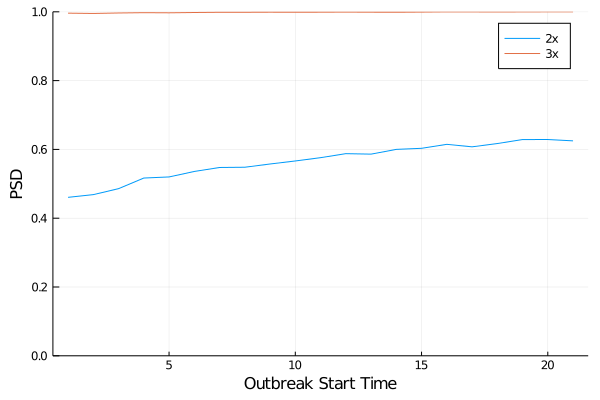

In [28]:
plot(1:T_end, hcat(sp2s, sp3s), label = ["2x" "3x"], xlabel = "Outbreak Start Time", ylabel = "PSD", ylim=(0, 1.0))

In [29]:
sp2r = probability_successfull_detection_l(Int(1e4), T_end, 47, 1, L, Γd, p0, p, n, apolicy_isotonic, α,
    tpolicy_random, 1);
sp3r = probability_successfull_detection_l(Int(1e4), T_end, 75, 1, L, Γd, p0, p, n, apolicy_isotonic, α,
    tpolicy_random, 1);
sp5r = probability_successfull_detection_l(Int(1e4), T_end, 110, 1, L, Γd, p0, p, n, apolicy_isotonic, α,
    tpolicy_random, 1);

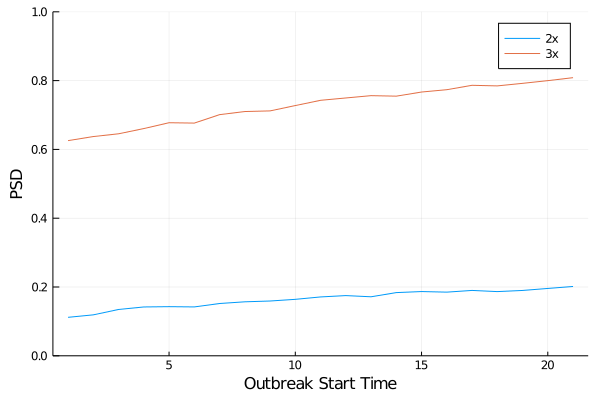

In [30]:
plot(1:T_end, hcat(sp2r, sp3r), label = ["2x" "3x"], xlabel = "Outbreak Start Time", ylabel = "PSD", ylim=(0, 1.0))

In [36]:
# thompson sampling
tstate_ts = ones(L, 2)
sp2ts = probability_successfull_detection_l(Int(1e4), T_end, 47, 1, L, Γd, p0, p, n, apolicy_isotonic, α,
    tpolicy_thompson, tstate_ts);
sp3ts = probability_successfull_detection_l(Int(1e4), T_end, 75, 1, L, Γd, p0, p, n, apolicy_isotonic, α,
    tpolicy_thompson, tstate_ts);
sp5ts = probability_successfull_detection_l(Int(1e4), T_end, 110, 1, L, Γd, p0, p, n, apolicy_isotonic, α,
    tpolicy_thompson, tstate_ts);

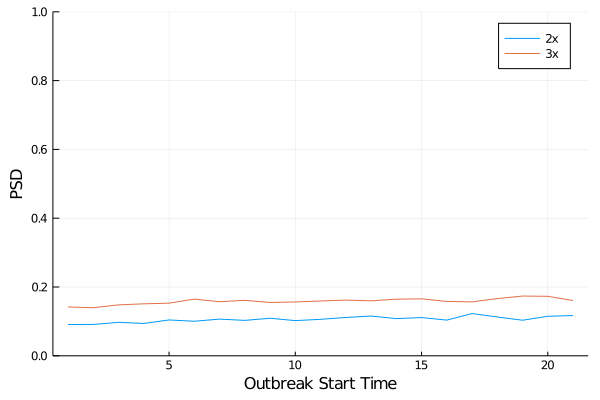

In [37]:
plot(1:T_end, hcat(sp2ts, sp3ts), label = ["2x" "3x"], xlabel = "Outbreak Start Time", ylabel = "PSD", ylim=(0, 1.0))